In [ ]:
import numpy as np #Linear
import pandas as pd #Data Process
import tensorflow as tf
import datetime, os
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading Dataframes
train_df = pd.read_csv('drive/MyDrive/DataSet-BoneAge/boneage-training-dataset.csv')
test_def = pd.read_csv('drive/MyDrive/DataSet-BoneAge/boneage-test-dataset.csv')
#Afzodan Pasvand
train_df['id'] = train_df['id'].apply(lambda x: str(x)+'.png')
test_def['Case ID'] = test_def['Case ID'].apply(lambda x: str(x)+'.png')

train_df.head()


,id,boneage,male
0,1386.png,30,False
1,1392.png,162,True
2,1397.png,18,False
3,1401.png,132,False
4,1410.png,57,True


male      450
female    350
Name: gender, dtype: int64


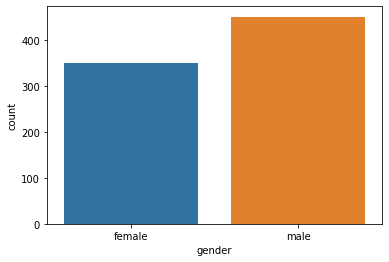

In [ ]:
#finding Out the number of male & female
train_df['gender'] = train_df['male'].apply(lambda x: 'male' if x else 'female')
print(train_df['gender'].value_counts())
sns.countplot(x = train_df['gender'])

In [ ]:
#oldest child
print('MAX age: ' +str(train_df['boneage'].min()) + 'mouths')
#youngest child
print('MIN age: ' +str(train_df['boneage'].min()) + 'month')
#mean age
mean_bone_age = train_df['boneage'].mean()
print ('mean: ' +str(mean_bone_age))
#median bone age
print('median: ' +str(train_df['boneage'].median()))
#standard deviation
std_bone_age = train_df['boneage'].std()
#models perform
train_df['bone_age_z'] = (train_df['boneage'] - mean_bone_age)/(std_bone_age)
print(train_df.head())

MAX age: 3mouths
MIN age: 3month
mean: 127.255
median: 132.0
         id  boneage   male  gender  bone_age_z
0  1386.png       30  False  female   -2.239233
1  1392.png      162   True    male    0.799981
2  1397.png       18  False  female   -2.515525
3  1401.png      132  False  female    0.109251
4  1410.png       57   True    male   -1.617576


Text(0.5, 1.0, 'Number of children in each age group')

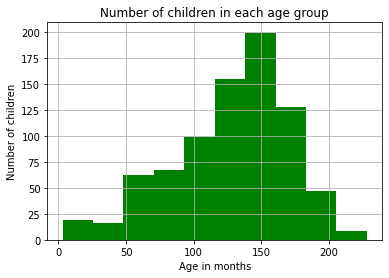

In [ ]:
#plotting a histogram
train_df['boneage'].hist(color = 'green')
plt.xlabel('Age in months')
plt.ylabel('Number of children')
plt.title('Number of children in each age group')

Text(0.5, 1.0, 'Relationship between number of children and bone age z score')

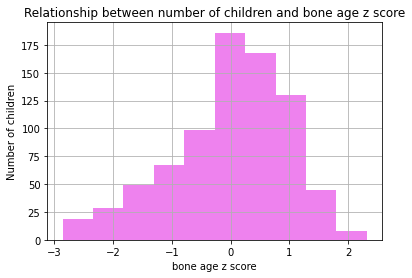

In [ ]:
train_df['bone_age_z'].hist(color = 'violet')
plt.xlabel('bone age z score')
plt.ylabel('Number of children')
plt.title('Relationship between number of children and bone age z score')


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


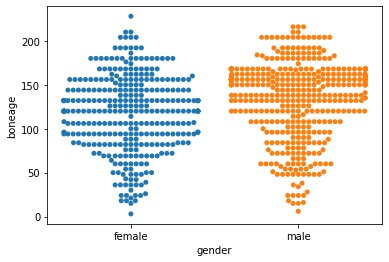

In [ ]:
#Relationship between age
sns.swarmplot(x = train_df['gender'], y =train_df['boneage'])

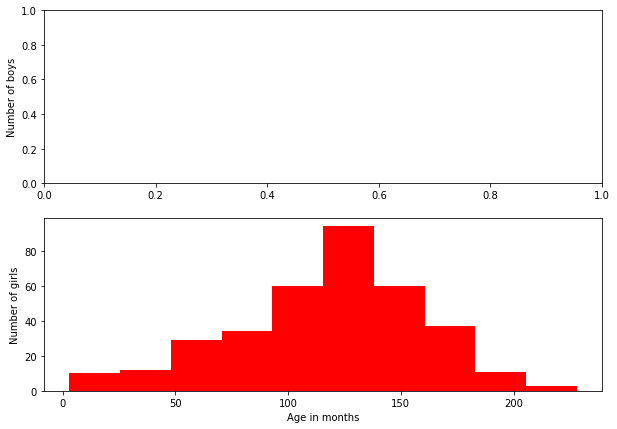

In [ ]:
#distribution of age
male = train_df[train_df['gender'] == 'male']
female = train_df[train_df['gender'] == 'female']
fig, ax = plt.subplots(2,1)
ax[0].set_ylabel('Number of boys')
ax[1].hist(female['boneage'],color = 'red')
ax[1].set_xlabel('Age in months')
ax[1].set_ylabel('Number of girls')
fig.set_size_inches((10,7))

In [ ]:
#df_train, df_valid = train_test_split(train_df, test_size = 0.2, random_state = 0)

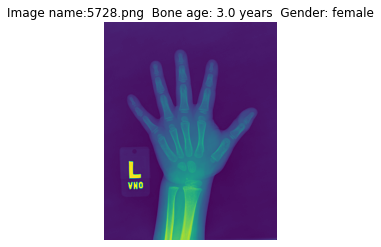

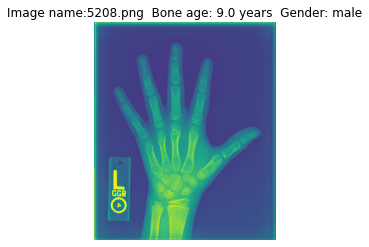

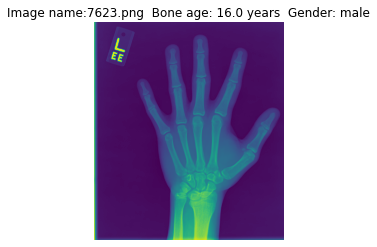

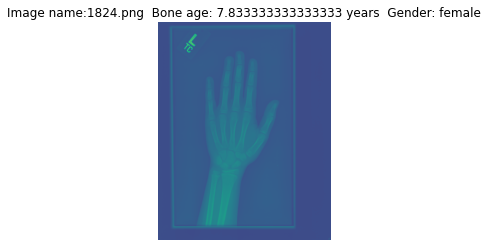

In [ ]:
import matplotlib.image as mpimg
for filename, boneage, gender in train_df[['id','boneage','gender']].sample(4).values:
    img = mpimg.imread('drive/MyDrive/DataSet-BoneAge/Train/'+ filename)
    plt.imshow(img)
    plt.title('Image name:{}  Bone age: {} years  Gender: {}'.format(filename, boneage/12, gender))
    plt.axis('off')
    plt.show()

In [ ]:
#library required for image preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from  keras.applications.xception import preprocess_input 

#reducing down the size of the image 
img_size = 256

train_data_generator = ImageDataGenerator(preprocessing_function = preprocess_input)
val_data_generator = ImageDataGenerator(preprocessing_function = preprocess_input)

#train data generator
train_generator = train_data_generator.flow_from_dataframe(
    dataframe = train_df,
    directory = 'drive/MyDrive/DataSet-BoneAge/Train',
    x_col= 'id',
    y_col= 'bone_age_z',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode= 'other',
    flip_vertical = True,
    color_mode = 'rgb',
    target_size = (img_size, img_size))

#validation data generator
val_generator = val_data_generator.flow_from_dataframe(
    dataframe = train_df,
    directory = 'drive/MyDrive/DataSet-BoneAge/Train',
    x_col = 'id',
    y_col = 'bone_age_z',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode = 'other',
    flip_vertical = True,
    color_mode = 'rgb',
    target_size = (img_size, img_size))

#test data generator
test_data_generator = ImageDataGenerator(preprocessing_function = preprocess_input)

test_generator = test_data_generator.flow_from_directory(
    directory = 'drive/MyDrive/DataSet-BoneAge',
    shuffle = True,
    class_mode = None,
    color_mode = 'rgb',
    target_size = (img_size,img_size))

Found 800 validated image filenames.
Found 800 validated image filenames.
Found 1272 images belonging to 2 classes.


In [ ]:
test_X, test_Y = next(val_data_generator.flow_from_dataframe( 
                            train_df, 
                            directory = '/drive/MyDrive/DataSet-BoneAge/Train',
                            x_col = 'id',
                            y_col = 'bone_age_z', 
                            target_size = (img_size, img_size),
                            batch_size = 2523,
                            class_mode = 'other'
                            )) 

Found 0 validated image filenames.


/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 800 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
def plot_it(history):
    '''function to plot training and validation error'''
    fig, ax = plt.subplots( figsize=(20,10))
    ax.plot(history.history['mae_in_months'])
    ax.plot(history.history['val_mae_in_months'])
    plt.title('Model Error')
    plt.ylabel('error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    ax.grid(color='black')
    plt.show()

In [ ]:
from keras.metrics import mean_absolute_error
def mae_in_months(x_p, y_p):
    '''function to return mae in months'''
    return mean_absolute_error((std_bone_age*x_p + mean_bone_age), (std_bone_age*y_p + mean_bone_age)) 

In [ ]:
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense,Flatten
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras import Sequential

model_1 = tf.keras.applications.xception.Xception(input_shape = (img_size, img_size, 3),
                                           include_top = False,
                                           weights = 'imagenet')
model_1.trainable = True
model_2 = Sequential()
model_2.add(model_1)
model_2.add(GlobalMaxPooling2D())
model_2.add(Flatten())
model_2.add(Dense(10, activation = 'relu'))
model_2.add(Dense(1, activation = 'linear'))


#compile model
model_2.compile(loss ='mse', optimizer= 'adam', metrics = [mae_in_months] )

#model summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_max_pooling2d_1 (Glo  (None, 2048)             0         
 balMaxPooling2D)                                                
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                20490     
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 20,881,981
Trainable params: 20,827,453
Non-trainable params: 54,528
_____________________________________

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
logs_dir = '.\logs'
%tensorboard --logdir {logs_dir}

In [ ]:
 #early stopping
early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience= 5,
                              verbose=0, mode='auto')

#model checkpoint
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

#tensorboard callback
logdir = os.path.join(logs_dir,datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
tensorboard_callback =  TensorBoard(logdir, histogram_freq = 1)

#reduce lr on plateau
red_lr_plat = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

callbacks = [tensorboard_callback,early_stopping,mc, red_lr_plat]


#fit model
history = model_2.fit_generator(train_generator,
                            steps_per_epoch = 9,
                            validation_data = val_generator,
                            validation_steps = 1,
                            epochs = 5,
                            callbacks= callbacks)
history
%tensorboard --logdir logs
plot_it(history)

In [ ]:
model_2.load_weights('best_model.h5')
pred = mean_bone_age + std_bone_age*(model_2.predict(test_X, batch_size = 32, verbose = True))
test_months = mean_bone_age + std_bone_age*(test_Y)

ord_ind = np.argsort(test_Y)
ord_ind = ord_ind[np.linspace(0, len(ord_ind)-1, 8).astype(int)] # take 8 evenly spaced ones
fig, axs = plt.subplots(4, 2, figsize = (15, 30))
for (ind, ax) in zip(ord_ind, axs.flatten()):
    ax.imshow(test_X[ind, :,:,0], cmap = 'bone')
    ax.set_title('Age: %fY\nPredicted Age: %fY' % (test_months[ind]/12.0, 
                                                           pred[ind]/12.0))
    ax.axis('off')
fig.savefig('trained_image_predictions.png', dpi = 300)

ValueError: ignored

NameError: ignored

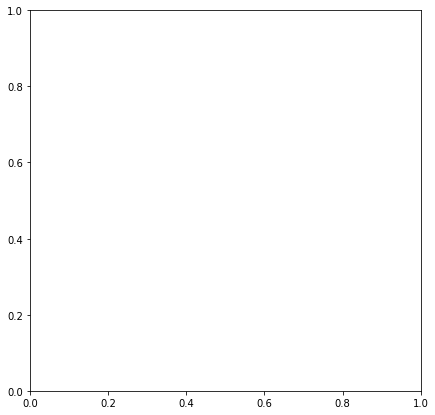

In [ ]:
fig, ax = plt.subplots(figsize = (7,7))
ax.plot(test_months, pred, 'r', label = 'prediction')
ax.plot(test_months, test_months, 'b-', label = 'actual')
ax.legend(loc = 'upper right')
ax.set_xlabel('Actual Age (Months)')
ax.set_ylabel('Predicted Age (Months)')